In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
df_city = pd.read_csv("E:\STUDY MATERIAL\DATA SCIENCE\machine learning and python\project files\cities.csv", header=0)

In [3]:
#first few rows of data frame
df_city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [4]:
# i have rename the column name
df_city.rename(columns={'Metrio City': 'metro', 'non-metro cities': 'non_metro'}, inplace=True)

In [5]:
# I have created a function assign numerical values to city based on metro and non metro
def city(row):
    if row['City'] in df_city['metro'].values:
        return 1
    elif row['City'] in df_city['non_metro'].values:
        return 0
    else:
        return 'unknown'

In [6]:
df_college = pd.read_csv("E:\STUDY MATERIAL\DATA SCIENCE\machine learning and python\project files\Colleges.csv", header=0)

In [7]:
#display the first few rows
df_college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [8]:
df_college.rename(columns={'Tier 1': 'Tier_1', 'Tier 2': 'Tier_2', 'Tier 3': 'Tier_3'}, inplace=True)

In [9]:
# i have created the function to assign tier based on college name
def tier(row):
    if row['College'] in df_college['Tier_1'].values:
        return 'Tier 1'
    elif row['College'] in df_college['Tier_2'].values:
        return 'Tier 2'
    elif row['College'] in df_college['Tier_3'].values:
        return 'Tier 3'
    else:
        return 'Unknown'

In [10]:
# Display the first few rows of the DataFrame for Colleges.csv
df_college.head()

,Tier_1,Tier_2,Tier_3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [11]:
df = pd.read_csv("E:\STUDY MATERIAL\DATA SCIENCE\machine learning and python\project files\ML case Study.csv", header=0)

In [12]:

df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [13]:
#displaying the shape 
df.shape

(1589, 8)

In [14]:
# Printing the number of duplicate rows 
print(len(df[df.duplicated()]))

0


In [15]:
# applying the tier function to create a new tier column on the college column
df['Tier'] = df.apply(tier, axis=1)

# Applying the city function to create a new metro city column on the college column
df['metro_city'] = df.apply(city, axis=1)

In [16]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,metro_city
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,0
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,0
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3,0
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3,0
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,0


In [17]:
# Removing the unused column from the data frame
del df['College']
del df['City']

In [18]:
# Creating dummy variables for the 'Tier' and 'Role' columns
df = pd.get_dummies(df, columns=['Tier', 'Role'])

In [19]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_Tier 1,Tier_Tier 2,Tier_Tier 3,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,0,False,True,False,False,True
1,57081.0,1,84,18,68005.87,0,False,True,False,True,False
2,60347.0,2,52,28,76764.02,0,False,False,True,True,False
3,49010.0,2,81,33,82092.39,0,False,False,True,True,False
4,57879.0,4,74,32,73878.10,0,True,False,False,True,False


In [20]:
# Renaming columns 
df.rename(columns={'Tier_Tier 1': 'Tier_1', 'Tier_Tier 2': 'Tier_2', 'Tier_Tier 3': 'Tier_3'}, inplace=True)

In [21]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,0,False,True,False,False,True
1,57081.0,1,84,18,68005.87,0,False,True,False,True,False
2,60347.0,2,52,28,76764.02,0,False,False,True,True,False
3,49010.0,2,81,33,82092.39,0,False,False,True,True,False
4,57879.0,4,74,32,73878.10,0,True,False,False,True,False


In [22]:
# Converting categorical columns to numerical format
df['Tier_1'] = df['Tier_1'].astype(int)
df['Tier_2'] = df['Tier_2'].astype(int)
df['Tier_3'] = df['Tier_3'].astype(int)
df['Role_Executive'] = df['Role_Executive'].astype(int)
df['Role_Manager'] = df['Role_Manager'].astype(int)

In [23]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,0,0,1,0,0,1
1,57081.0,1,84,18,68005.87,0,0,1,0,1,0
2,60347.0,2,52,28,76764.02,0,0,0,1,1,0
3,49010.0,2,81,33,82092.39,0,0,0,1,1,0
4,57879.0,4,74,32,73878.10,0,1,0,0,1,0


In [24]:
df.shape

(1589, 11)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   metro_city           1589 non-null   int64  
 6   Tier_1               1589 non-null   int32  
 7   Tier_2               1589 non-null   int32  
 8   Tier_3               1589 non-null   int32  
 9   Role_Executive       1589 non-null   int32  
 10  Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 105.6 KB


no null values find


In [26]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.514160,0.363751,0.297042,0.339207,0.793581,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.499957,0.481230,0.457099,0.473589,0.404862,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\RAJ\AppData\Local\Temp\ipykernel_19276\3892617723.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CTC'], color='blue')


<Axes: xlabel='CTC', ylabel='Density'>

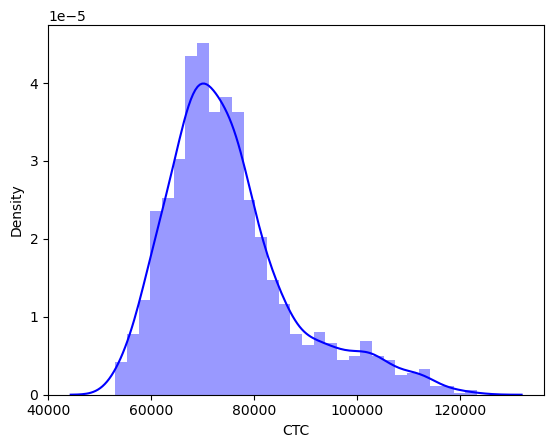

In [27]:

sns.distplot(df['CTC'], color='blue')

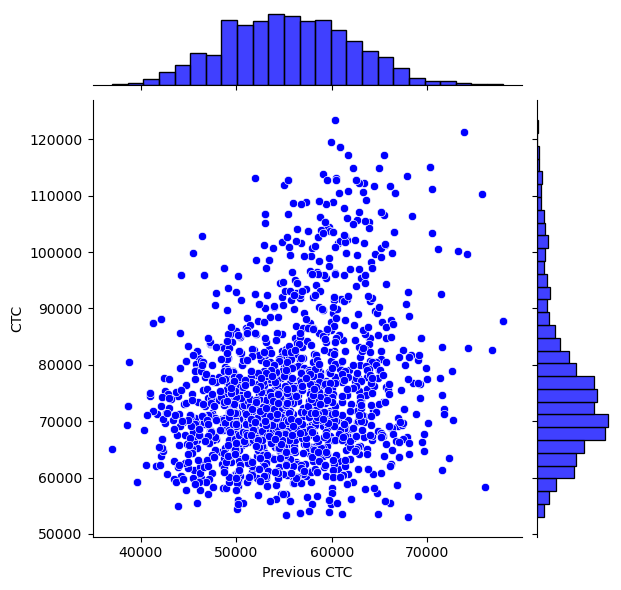

In [28]:
# Create a joint plot between 'Previous CTC' and 'CTC'
sns.jointplot(x='Previous CTC', y='CTC', data=df, color="blue")

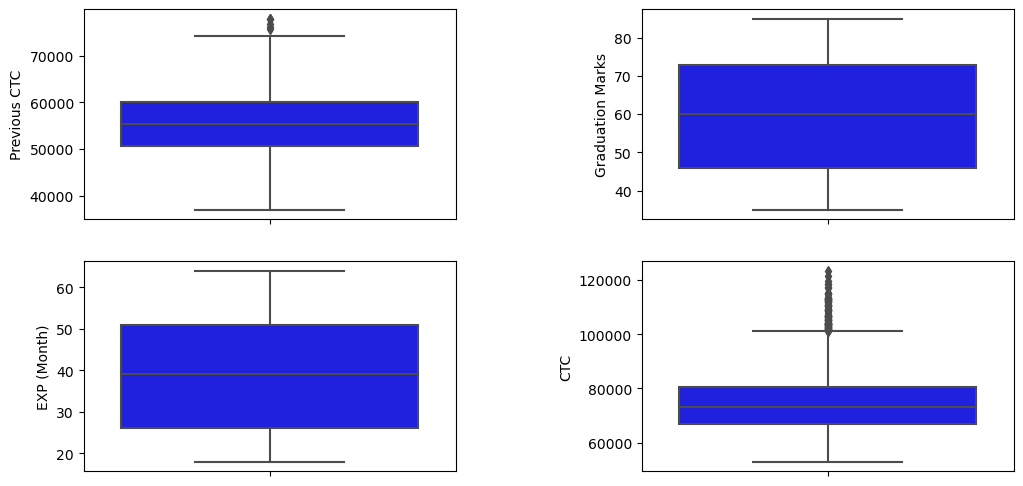

In [29]:
# i am using boxplot for checking the outliners  
import matplotlib.pyplot as plt

# Specify numerical columns
num_col = ['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC']

# Create a figure with subplots
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)

for i, col in enumerate(num_col, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col, color='blue')


plt.show()

In [30]:
# Calculate the 99th percentile of 'Previous CTC'
upper_limit = np.percentile(df['Previous CTC'], [99])[0]

# to find  upper limit
print(upper_limit)

71506.92


In [31]:
df[(df['Previous CTC'] > upper_limit)]

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
116,77911.0,1,50,58,87831.62,1,0,0,1,1,0
292,74198.0,1,57,25,99644.51,0,0,0,1,0,1
543,73856.0,1,75,54,121362.73,1,1,0,0,0,1
572,71543.0,4,82,30,61366.78,1,1,0,0,1,0
701,71549.0,4,47,50,83116.21,0,0,1,0,1,0
847,71756.0,4,67,23,72141.43,1,1,0,0,1,0
860,75785.0,4,63,37,110338.25,1,1,0,0,0,1
941,72319.0,1,51,50,63538.43,1,0,0,1,1,0
1024,72661.0,3,74,47,70238.70,1,1,0,0,1,0
1047,73214.0,4,57,22,100119.53,0,1,0,0,0,1


In [32]:
# Cap values in 'Previous CTC' column to 3 times the upper limit
df['Previous CTC'][(df['Previous CTC'] > 3 * upper_limit)] = 3 * upper_limit

C:\Users\RAJ\AppData\Local\Temp\ipykernel_19276\972866738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous CTC'][(df['Previous CTC'] > 3 * upper_limit)] = 3 * upper_limit


C:\Users\RAJ\AppData\Local\Temp\ipykernel_19276\529977559.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Previous CTC'], color='blue')


<Axes: xlabel='Previous CTC', ylabel='Density'>

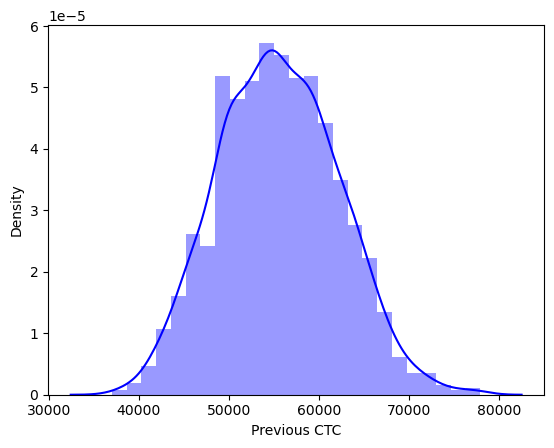

In [33]:

sns.distplot(df['Previous CTC'], color='blue')

In [34]:
upper_limit2 = np.percentile(df['CTC'], [99])[0]
print(upper_limit2)

112826.26


In [35]:
df[(df['CTC'] > upper_limit2)]

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
34,60894.0,4,80,28,118651.89,0,1,0,0,0,1
185,70258.0,4,38,36,115126.75,0,0,1,0,0,1
254,51912.0,2,66,50,113141.14,1,0,1,0,0,1
328,62264.0,2,52,64,114996.23,0,0,0,1,0,1
543,73856.0,1,75,54,121362.73,1,1,0,0,0,1
577,59101.0,3,56,31,113843.16,1,0,0,1,0,1
668,60476.0,1,85,62,113212.07,1,1,0,0,0,1
883,64930.0,1,66,51,114939.65,1,0,0,1,0,1
1146,61709.0,4,39,60,117207.24,1,1,0,0,0,1
1230,60298.0,1,47,52,123416.99,0,0,1,0,0,1


In [36]:
df['CTC'][(df['CTC'] > 3 * upper_limit2)] = 3 * upper_limit2

C:\Users\RAJ\AppData\Local\Temp\ipykernel_19276\1483690206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CTC'][(df['CTC'] > 3 * upper_limit2)] = 3 * upper_limit2


In [37]:
# Calculate correlation matrix for the dataframe
df.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,0.004644,-0.031366,-0.010947,0.042438,-0.012321,0.012321
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.051670,0.045931,0.004271,-0.050794,0.017150,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.018616,0.005666,-0.018419,0.012021,-0.017858,0.017858
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.023613,-0.003323,-0.014558,0.017427,0.026751,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,-0.020365,0.019912,0.012346,-0.032149,-0.621311,0.621311
metro_city,0.004644,0.051670,-0.018616,-0.023613,-0.020365,1.000000,0.002135,0.022917,-0.024288,0.048671,-0.048671
Tier_1,-0.031366,0.045931,0.005666,-0.003323,0.019912,0.002135,1.000000,-0.491510,-0.541736,-0.015158,0.015158
Tier_2,-0.010947,0.004271,-0.018419,-0.014558,0.012346,0.022917,-0.491510,1.000000,-0.465741,0.004865,-0.004865
Tier_3,0.042438,-0.050794,0.012021,0.017427,-0.032149,-0.024288,-0.541736,-0.465741,1.000000,0.010706,-0.010706
Role_Executive,-0.012321,0.017150,-0.017858,0.026751,-0.621311,0.048671,-0.015158,0.004865,0.010706,1.000000,-1.000000


#simple regresssion


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# Create a Linear Regression model and fit it to the data
lm = LinearRegression()
y_slr = df['CTC']
x_slr = df[['EXP (Month)']]
lm.fit(x_slr, y_slr)

LinearRegression()

In [40]:
# Print the intercept and coefficients of the linear regression model
print(lm.intercept_, lm.coef_)

64864.26270700767 [268.6413489]


In [41]:
# Predict CTC values using the linear regression model
lm.predict(x_slr)

array([69968.44833614, 69699.80698724, 72386.22047626, ...,
       69968.44833614, 72654.86182516, 69699.80698724])

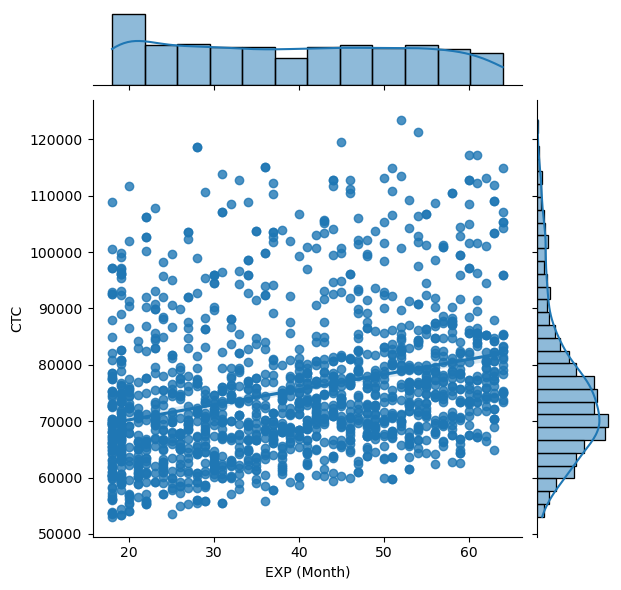

In [42]:
# Visualize the linear regression model's fit on the data
sns.jointplot(x=df['EXP (Month)'], y=df['CTC'], data=df, kind='reg')

# DIVIDE THE DATA IN TEST AND TRAIN SPLIT

In [43]:
from sklearn.model_selection import train_test_split
 # Spliting the dataset into features (x) and the target variable (y)
X = df.loc[:, df.columns != 'CTC']
y= df['CTC']
# Split the data into training and testing sets with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 10) (318, 10) (1271,) (318,)


# MULTIPLE LINEAR REGRESSION


In [45]:
from sklearn.linear_model import LinearRegression ### importing linear regression object
ln1=LinearRegression() 

In [46]:
### fitting x_train and y_train on linear regression data
ln1.fit(X_train,y_train)

LinearRegression()

In [47]:
print(ln1.intercept_, ln1.coef_)

45804.703862026305 [ 4.29560583e-01  9.16241174e+01  1.01809891e+01  2.57802465e+02
  9.14527889e+02  2.20836623e+02  3.59103585e+02 -5.79940208e+02
 -9.62636903e+03  9.62636903e+03]


In [48]:
from sklearn.metrics import r2_score, mean_squared_error #importing r2_score and mse from sklearn

In [49]:
##predictin x and y variables
y_test_p= ln1.predict(X_test)
y_train_p= ln1.predict(X_train)

In [50]:
r2_score(y_test, y_test_p) ###R2 of test

0.5366674761765405

In [51]:
r2_score(y_train, y_train_p) ####R2 of train

0.5335038205027318

In [52]:
mean_squared_error(y_test, y_test_p, squared=False)

8291.641811462556

In [53]:
print("Linear Regression:")
print(f"R-squared (R^2) - Train: {r2_score(y_test, y_test_p)}, Test: {r2_score(y_train, y_train_p)}")
print(f"Mean Squared Error (MSE) - Train: {mean_squared_error(y_train, y_train_p)}, Test: {mean_squared_error(y_test, y_test_p, squared=False)}\n")

Linear Regression:
R-squared (R^2) - Train: 0.5366674761765405, Test: 0.5335038205027318
Mean Squared Error (MSE) - Train: 75026071.408006, Test: 8291.641811462556



In [54]:
from sklearn import preprocessing

In [55]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# RIDGE REGRESSION

In [56]:
# Import the validation_curve module from scikit-learn
from sklearn.model_selection import validation_curve

In [57]:
# Define a range of alpha values for Ridge regression
param_range = np.logspace(-2, 8, 100)

In [58]:
# Import the Ridge regression model from scikit-learn
from sklearn.linear_model import Ridge

In [59]:
# Perform cross-validated validation curve to find the best alpha for Ridge regression
train_scores, valid_scores = validation_curve(
    Ridge(), X_train_s, y_train, param_name="alpha", param_range=param_range, cv=5, scoring='r2')

In [60]:
# Calculate mean R-squared scores for training and validation sets
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(valid_scores, axis = 1)

In [61]:
# Find the alpha value with the highest validation R-squared
np.where(test_mean==max(test_mean))

(array([30], dtype=int64),)

In [62]:
# Train a Ridge regression model with the best alpha
ln1_best = Ridge(alpha = param_range[30])
ln1_best.fit(X_train_s, y_train)

Ridge(alpha=10.722672220103231)

In [63]:
ln1_best.predict(X_train_s)

array([98331.65213125, 74120.26894224, 79229.31588627, ...,
       70680.40885808, 66376.90041009, 64144.8483454 ])

In [64]:
ln1_best.predict(X_test_s)

array([69103.28263809, 64254.92417147, 63739.1987679 , 71997.22260219,
       76667.23898114, 88736.7373297 , 69246.81305502, 71367.44793289,
       70966.53770842, 73630.39004638, 72270.28419405, 78582.53843415,
       85420.11764726, 78099.31373499, 77076.09690345, 93960.65913441,
       66399.76146096, 69039.14616283, 67285.91677749, 81781.55800355,
       91142.40110084, 96544.64265718, 71209.10742538, 67484.23493064,
       72583.82876218, 68306.86966018, 73627.68526001, 94500.90500035,
       72140.0835308 , 74401.32869792, 69008.9370696 , 69955.32641021,
       85470.02498289, 80538.31021215, 98658.07904935, 80318.9172221 ,
       71372.26418478, 80785.57411537, 74026.58408362, 65823.81578572,
       71501.43381754, 87862.27298079, 73034.37606993, 67860.19249436,
       74959.93622992, 78195.69964275, 86488.59623627, 68172.6897819 ,
       69486.6170619 , 76639.13033968, 90152.08016158, 69753.65076428,
       91551.02088016, 73119.99725431, 89839.82154365, 69491.02764058,
      

In [65]:
# Calculate the R-squared score
r2_score(y_train,ln1_best.predict(X_train_s))

0.533488604458334

In [66]:
r2_score(y_test,ln1_best.predict(X_test_s))

0.5365825624279877

In [67]:
# Finding MSE value for linear regression
mean_squared_error(y_test, ln1_best.predict(X_test_s), squared=False)

8292.401570486747

In [68]:
# Print the results
print("Ridge Regression:")
print(f"R-squared (R^2) - Train: {r2_score(y_train,ln1_best.predict(X_train_s))}, Test: {r2_score(y_test,ln1_best.predict(X_test_s))}")
print(f"Mean Squared Error (MSE) - Train: {mean_squared_error(y_train,ln1_best.predict(X_train_s), squared=False)}, Test: {mean_squared_error(y_test, ln1_best.predict(X_test_s), squared=False)}\n")

Ridge Regression:
R-squared (R^2) - Train: 0.533488604458334, Test: 0.5365825624279877
Mean Squared Error (MSE) - Train: 8661.900402788033, Test: 8292.401570486747



# lasso regression

In [69]:
param_range2 = np.logspace(-2,8,100)

In [70]:
# Import Lasso regression model
from sklearn.linear_model import Lasso

In [71]:
# Perform cross-validated validation curve to find the best alpha for Lasso regression
train_score_l, valid_score_l = validation_curve(Lasso(), X_train_s, y_train, param_name="alpha", param_range = param_range2, cv=5, scoring='r2')

In [72]:
# Calculate mean R-squared scores for training and validation sets with Lasso regression
train_mean_l = np.mean(train_score_l, axis=1)
test_mean_l = np.mean(valid_score_l, axis=1)

In [73]:
# Identify the alpha value with the highest R-squared
np.where(test_mean_l==max(test_mean_l))

(array([39], dtype=int64),)

In [74]:
# Train a Lasso regression model with the best alpha
ln2_best = Lasso(alpha = param_range2[39])
ln2_best.fit(X_train_s, y_train)

Lasso(alpha=86.97490026177834)

In [75]:
ln2_best.predict(X_train_s)

array([97926.33028565, 74214.8559853 , 79240.62162971, ...,
       70535.51110735, 66629.84078582, 64276.35722756])

In [76]:
ln2_best.predict(X_test_s)

array([69019.33032291, 64390.06576342, 63587.2886881 , 72168.23895861,
       76608.99099052, 88923.59188014, 69305.93123459, 71482.29953649,
       71156.09669352, 73843.1402233 , 72395.87185541, 78532.57717035,
       85585.80902691, 78179.48006681, 77061.46073093, 93557.9970026 ,
       66167.63000471, 68833.72679837, 67322.22318288, 81421.47961899,
       90865.88318109, 96313.78528565, 71379.22942132, 67397.85119205,
       72740.5043779 , 68336.08005293, 73549.59047391, 94164.93036187,
       72405.75742872, 74438.23200467, 69004.49132446, 69881.85187782,
       85353.24821954, 80530.92244898, 98338.45414735, 79983.04382109,
       71297.36650121, 80933.92201416, 73822.63298583, 66086.05508966,
       71650.29702114, 87694.8452489 , 73132.59902275, 67701.38253863,
       74871.04680053, 77932.03161175, 86763.15262692, 67921.9813633 ,
       69531.19869709, 76658.40007527, 89887.58627483, 69813.32102187,
       91435.46041473, 73086.55418568, 89463.84928655, 69680.94831651,
      

In [77]:
 r2_score(y_train, ln2_best.predict(X_train_s))

0.5331672792979155

In [78]:
mean_squared_error(y_test, ln2_best.predict(X_test_s))

68643390.18170552

In [79]:
# Print the results
print("Lasso Regression:")
print(f"R-squared (R^2) - Train: { r2_score(y_train, ln2_best.predict(X_train_s))}, Test: {r2_score(y_test, ln2_best.predict(X_test_s))}")
print(f"Mean Squared Error (MSE) - Train: {mean_squared_error(y_train, ln2_best.predict(X_train_s))}, Test: {mean_squared_error(y_test, ln2_best.predict(X_test_s))}\n")

Lasso Regression:
R-squared (R^2) - Train: 0.5331672792979155, Test: 0.5373948689445129
Mean Squared Error (MSE) - Train: 75080196.96267076, Test: 68643390.18170552



# DECISION TREE REGRESSION 

In [80]:
from sklearn import tree

In [81]:
# Create a DecisionTreeRegressor with a maximum depth of 3
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [82]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [83]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [84]:
y_test_pred

array([ 73242.49487805,  67137.92249315,  67137.92249315,  77249.90582677,
        73242.49487805,  87264.44514286,  70080.03361607,  73242.49487805,
        67137.92249315,  73242.49487805,  70080.03361607,  77249.90582677,
        95311.75026316,  77249.90582677,  73242.49487805, 104985.9661039 ,
        67137.92249315,  67137.92249315,  67137.92249315,  77249.90582677,
       104985.9661039 , 104985.9661039 ,  67137.92249315,  67137.92249315,
        70080.03361607,  67137.92249315,  77249.90582677, 104985.9661039 ,
        77249.90582677,  73242.49487805,  67137.92249315,  67137.92249315,
        77180.13443038,  77249.90582677, 104985.9661039 ,  77249.90582677,
        67137.92249315,  77180.13443038,  67137.92249315,  67137.92249315,
        67137.92249315,  77180.13443038,  73242.49487805,  67137.92249315,
        77249.90582677,  70080.03361607,  77180.13443038,  67137.92249315,
        67137.92249315,  73242.49487805,  95311.75026316,  77249.90582677,
       104985.9661039 ,  

In [85]:
mean_squared_error(y_test, y_test_pred)

60424631.02613475

In [86]:
r2_score(y_train, y_train_pred)

0.6137194061789908

In [87]:
r2_score(y_test, y_test_pred)

0.5927831611924911

In [88]:
# Print the results
print("Decision Tree Regression:")
print(f"R-squared (R^2) - Train: {r2_score(y_train, y_train_pred)}, Test: {r2_score(y_test, y_test_pred)}")
print(f"Mean Squared Error (MSE) - Train: {mean_squared_error(y_train, y_train_pred)}, Test: {mean_squared_error(y_test, y_test_pred)}\n")

Decision Tree Regression:
R-squared (R^2) - Train: 0.6137194061789908, Test: 0.5927831611924911
Mean Squared Error (MSE) - Train: 62125086.31211998, Test: 60424631.02613475



# DECISION TREE REGRESSION WITH GRIDSEARCH CV 

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Define the DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
# Define the hyperparameter grid to search
param_grid = {'max_depth': [2, 3, 4, 5],'min_samples_split': [2,4, 5,6, 10],'min_samples_leaf': [1, 2, 4,6,8]}
# Create the GridSearchCV object
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit the model
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Get the best model
best_model = grid_search.best_estimator_
# Make predictions on the test set
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate R-squared scores
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print("Decision Tree Regression with GridSearchCV")
print(f"Mean Squared Error on the training set: {mse_train}")
print(f"Mean Squared Error on the test set: {mse_test}")

# Print R-squared scores
print(f"R-squared score on the training set: {r2_train}")
print(f"R-squared score on the test set: {r2_test}")

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

Decision Tree Regression with GridSearchCV
Mean Squared Error on the training set: 57933285.64360235
Mean Squared Error on the test set: 58875901.69009934
R-squared score on the training set: 0.6397831325660944
R-squared score on the test set: 0.603220439065417
Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


# RANDOM FOREST REGRESSOR WITH GRIDSEARCHCV

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Define the hyperparameters and their possible values
param_grid = {'n_estimators': [100, 300],'max_depth': [20, 30],'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]}
# Create a RandomForestRegressor
rf_gs = RandomForestRegressor()
# Create the GridSearchCV object
grid_search = GridSearchCV(rf_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)
print("RandomForestRegressor with GridSearchCV:")
# Pint the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)
# Get the best estimator (RandomForestRegressor) with the best hyperparameters
best_rf = grid_search.best_estimator_
# Use the best estimator to make predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)
# Calculate the R-squared scores for training data
r2_train_rf = r2_score(y_train, y_train_pred)
# Calculate the R-squared scores for testing data
r2_test_rf = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_rf = mean_squared_error(y_train, y_train_pred)
# Calculate the Mean Squared Error for testing data
mse_test_rf = mean_squared_error(y_test, y_test_pred)
# Print the results
print("R-squared (R2) for Training Data:", r2_train_rf)
print("R-squared (R2) for Testing Data:", r2_test_rf)
print("Mean Squared Error (MSE) for Training Data:", mse_train_rf)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_rf)

RandomForestRegressor with GridSearchCV:
Best Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
R-squared (R2) for Training Data: 0.8973929026362971
R-squared (R2) for Testing Data: 0.6479842578188524
Mean Squared Error (MSE) for Training Data: 16502187.482164528
Mean Squared Error (MSE) for Testing Data: 52233648.78273448


# INSTALLING XGBOOST 


In [91]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# BAGGING REGRESSOR

In [93]:
from sklearn.ensemble import BaggingRegressor
# Create a base regression model
base_model = DecisionTreeRegressor(random_state=0)
# Create a BaggingRegressor with the base model
bagging_reg = BaggingRegressor(base_model, random_state=0)
# Define the hyperparameters and their possible values
param_grid = {'n_estimators': [50, 100, 150, 200]}
# Create the GridSearchCV object
grid_search = GridSearchCV(bagging_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)
# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
# Print the best hyperparameters and corresponding mean squared error
print("Bagging Regressor:")
print("Best Hyperparameters: ", grid_search.best_params_)
# Get the best estimator (BaggingRegressor) with the best hyperparameters
best_bagging_reg = grid_search.best_estimator_
# Use the best estimator to make predictions
y_train_pred = best_bagging_reg.predict(X_train)
y_test_pred = best_bagging_reg.predict(X_test)  # Assuming X_test is your testing data
# Calculate the R-squared scores for training data
r2_train_bagging_reg = r2_score(y_train, y_train_pred)
# Calculate the R-squared scores for testing data
r2_test_bagging_reg = r2_score(y_test, y_test_pred)
# Calculate the Mean Squared Error for training data
mse_train_bagging_reg = mean_squared_error(y_train, y_train_pred)
mse_test_bagging_reg = mean_squared_error(y_test, y_test_pred)
# Print the results

print("R-squared (R2) for Training Data:", r2_train_bagging_reg)
print("R-squared (R2) for Testing Data:", r2_test_bagging_reg)
print("Mean Squared Error (MSE) for Training Data:", mse_train_bagging_reg)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_bagging_reg)


Bagging Regressor:
Best Hyperparameters:  {'n_estimators': 100}
R-squared (R2) for Training Data: 0.947404881575045
R-squared (R2) for Testing Data: 0.6536800960189557
Mean Squared Error (MSE) for Training Data: 8458815.493228097
Mean Squared Error (MSE) for Testing Data: 51388475.18275845


# BOOSTING METHODS

In [94]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import time

# XGBoost
start_time = time.time()
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
xgb_model.fit(X_train, y_train)
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)
xgb_training_time = time.time() - start_time

# Gradient Boosting
start_time = time.time()
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_model.fit(X_train, y_train)
gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)
gb_train_r2 = r2_score(y_train, gb_train_pred)
gb_test_r2 = r2_score(y_test, gb_test_pred)
gb_training_time = time.time() - start_time

# AdaBoost
start_time = time.time()
ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
ada_model.fit(X_train, y_train)
ada_train_pred = ada_model.predict(X_train)
ada_test_pred = ada_model.predict(X_test)
ada_train_r2 = r2_score(y_train, ada_train_pred)
ada_test_r2 = r2_score(y_test, ada_test_pred)
ada_training_time = time.time() - start_time

# Cross-validation scores
cv_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
cv_gb = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
cv_ada = cross_val_score(ada_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()

# Print results
print("Boosting:")
print("XGBoost MSE on train set:", mean_squared_error(y_train, xgb_train_pred))
print("XGBoost R2 Score on train set:", xgb_train_r2)
print("XGBoost MSE on test set:", mean_squared_error(y_test, xgb_test_pred))
print("XGBoost R2 Score on test set:", xgb_test_r2)

print("Gradient Boosting MSE on train set:", mean_squared_error(y_train, gb_train_pred))
print("Gradient Boosting R2 Score on train set:", gb_train_r2)
print("Gradient Boosting MSE on test set:", mean_squared_error(y_test, gb_test_pred))
print("Gradient Boosting R2 Score on test set:", gb_test_r2)

print("AdaBoost MSE on train set:", mean_squared_error(y_train, ada_train_pred))
print("AdaBoost R2 Score on train set:", ada_train_r2)
print("AdaBoost MSE on test set:", mean_squared_error(y_test, ada_test_pred))
print("AdaBoost R2 Score on test set:", ada_test_r2)

print("\nXGBoost Cross-Validation MSE:", -cv_xgb)
print("Gradient Boosting Cross-Validation MSE:", -cv_gb)
print("AdaBoost Cross-Validation MSE:", -cv_ada)

print("\nXGBoost Training Time:", xgb_training_time)
print("Gradient Boosting Training Time:", gb_training_time)
print("AdaBoost Training Time:", ada_training_time)

# Identify the best model
best_model = min({"XGBoost": mean_squared_error(y_test, xgb_test_pred),
                  "Gradient Boosting": mean_squared_error(y_test, gb_test_pred),
                  "AdaBoost": mean_squared_error(y_test, ada_test_pred)}.items(), key=lambda x: x[1])

print(f"\nBest Boosting Algorithm: {best_model[0]} with MSE: {best_model[1]}")


Boosting:
XGBoost MSE on train set: 12458681.615640054
XGBoost R2 Score on train set: 0.9225345634364543
XGBoost MSE on test set: 54218122.41774174
XGBoost R2 Score on test set: 0.6346103891394561
Gradient Boosting MSE on train set: 44628728.61081262
Gradient Boosting R2 Score on train set: 0.7225080428435853
Gradient Boosting MSE on test set: 56652269.71261414
Gradient Boosting R2 Score on test set: 0.6182060561749558
AdaBoost MSE on train set: 60558184.574090004
AdaBoost R2 Score on train set: 0.6234620684392009
AdaBoost MSE on test set: 60450454.93164119
AdaBoost R2 Score on test set: 0.5926091273756946

XGBoost Cross-Validation MSE: 58742562.79002507
Gradient Boosting Cross-Validation MSE: 59167220.74099176
AdaBoost Cross-Validation MSE: 63320045.15344093

XGBoost Training Time: 0.08896493911743164
Gradient Boosting Training Time: 0.20366692543029785
AdaBoost Training Time: 0.25098514556884766

Best Boosting Algorithm: XGBoost with MSE: 54218122.41774174


## 1. Your views about the problem statement?

TechWorks Consulting, a company known for connecting businesses with great talent, is working on creating a machine learning model. The goal is to not only find the best people for the job but also to decide on fair and competitive salaries. The idea is to use data science to make smart choices in hiring, ensuring that the company can attract and keep excellent professionals. As a data scientist, my job is to build a model that looks at things like college reputation, experience, job role, past pay, and academic records. This model will be really important in making sure the hiring process is effective and fair.

## 2.What will be your approach to solving this task? 

# DATA PREPROCESSING:
Import Essential Libraries:
- Import the necessary libraries, including pandas, numpy, seaborn, and matplotlib.
Load CSV Files:
- Load the three CSV files into the system using appropriate file paths.
Explore Data:
- Examine the loaded data to gain insights into its structure and content.
Transform "College" Feature:
- Convert the "College" feature into a numerical representation based on predefined college tiers.
Categorize "City" Feature:
- Represent the "City" feature numerically to distinguish between metro and non-metro cities.
Create Dummy Variables:
- Generate dummy variables for the "Tier" and "Role" fields to facilitate further analysis.
Conduct Exploratory Data Analysis (EDA):
- Perform a comprehensive EDA, including histograms, box plots, and correlation matrices, to better understand the distribution and relationships within the dataset.
Handle Null Values:
- Implement robust strategies to handle null values in the dataset, ensuring data integrity.
Identify and Address Outliers:
- Utilize percentile analysis to identify outliers and take appropriate measures to handle them effectively.


MODEL SELECTION:
- Simple Linear Regression
- Multiple Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree Regression
- Random Forest Regressor
- XG Boost Regressor
- Bagging Regressor


MODEL TRANNING AND EVALUATION:
- Split the data for training and testing. Train the model, evaluate its performance using metrics like R-Squared and Mean Squared Error, and choose the model with the best results.


MODEL OPTIMIZATION:
- Optimize the model with cross-validation and hyperparameters.


CONCLUSION OR RESULT:
- After performing the all model and get the result I will choose the best model according to R2 score and Mean Squared Error (MSE). Model which have High R2 score and Less MSE is the best one.  


## 3. What were the available ML model options you had to perform this task?

Machine Learning Model Options
The machine learning model options considered for this task encompass a spectrum of regression models tailored for predicting salary structures:

Simple Linear Regression:
- Suitable for straightforward, linear relationships between one feature and salary.


Multiple Linear Regression:
- Useful when multiple features influence salary, allowing consideration of complex relationships.


Ridge Regression:
- Prevents overfitting by adding a penalty term, particularly beneficial for handling multicollinearity.


Lasso Regression:
- Aids in feature selection and combats overfitting by encouraging some features to have zero influence on salary prediction.


Decision Tree Regression:
- Captures non-linear relationships and complex patterns when the salary prediction is not linear.


Random Forest Regressor:
An ensemble learning model that combines multiple decision trees, enhancing predictive performance.


XG Boost Regressor:
- A gradient boosting model known for high predictive power and computational efficiency.


Bagging Regressor:
- Utilizes Bootstrap Aggregating to create an ensemble of multiple decision tree regressors, improving prediction accuracy.

## 4.Which model’s performance is best and what could be the possible reason for that?

## Evaluation of Model Performance

### Linear Regression:
- **R-squared (R^2):**
  - Train: 0.5367
  - Test: 0.5335
- **Mean Squared Error (MSE):**
  - Train: 75026071.4080
  - Test: 8291.6418

### Ridge Regression:
- **R-squared (R^2):**
  - Train: 0.5335
  - Test: 0.5366
- **Mean Squared Error (MSE):**
  - Train: 8661.9004
  - Test: 8292.4016

### Lasso Regression:
- **R-squared (R^2):**
  - Train: 0.5332
  - Test: 0.5374
- **Mean Squared Error (MSE):**
  - Train: 75080196.9627
  - Test: 68643390.1817

### Decision Tree Regression:
- **R-squared (R^2):**
  - Train: 0.6137
  - Test: 0.5928
- **Mean Squared Error (MSE):**
  - Train: 62125086.3121
  - Test: 60424631.0261

### Decision Tree Regression with GridSearchCV:
- **Best Hyperparameters:**
  - {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
- **R-squared (R^2):**
  - Train: 0.6398
  - Test: 0.6032
- **Mean Squared Error (MSE):**
  - Train: 57933285.6436
  - Test: 58875901.6901

### RandomForestRegressor with GridSearchCV:
- **Best Hyperparameters:**
  - {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
- **R-squared (R2):**
  - Train: 0.8971
  - Test: 0.6518
- **Mean Squared Error (MSE):**
  - Train: 16550581.0031
  - Test: 51665892.7021
- **Mean R-squared (R2) for Cross-Validation:**
  - 0.6034
- **Mean Mean Squared Error (MSE) for Cross-Validation:**
  - 63146810.0167

### Boosting:
- Boosting:
-  XGBoost MSE on train set: 12458681.615640054
- XGBoost R2 Score on train set: 0.9225345634364543
- XGBoost MSE on test set: 54218122.41774174
- XGBoost R2 Score on test set: 0.6346103891394561
- Gradient Boosting MSE on train set: 44628728.61081262
- Gradient Boosting R2 Score on train set: 0.7225080428435853
- Gradient Boosting MSE on test set: 56652269.71261414
- Gradient Boosting R2 Score on test set: 0.6182060561749558
- AdaBoost MSE on train set: 60558184.574090004
- AdaBoost R2 Score on train set: 0.6234620684392009
- AdaBoost MSE on test set: 60450454.93164119
- AdaBoost R2 Score on test set: 0.5926091273756946

- XGBoost Cross-Validation MSE: 58742562.79002507
- Gradient Boosting Cross-Validation MSE: 59167220.74099176
- AdaBoost Cross-Validation MSE: 63320045.15344093

- XGBoost Training Time: 0.08896493911743164
- Gradient Boosting Training Time: 0.20366692543029785
- AdaBoost Training Time: 0.25098514556884766

Best Boosting Algorithm: XGBoost with MSE: 54218122.41774174

### Bagging Regressor:
- **Best Hyperparameters:**
  - {'n_estimators': 100}
- **R-squared (R2):**
  - Train: 0.9474
  - Test: 0.6537
- **Mean Squared Error (MSE):**
  - Train: 8458815.4932
  - Test: 51388475.1828
  
  ### Best Performing Model: Random Forest Regressor with GridSearchCV and XGBoost
- Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

### Reasons for Selection:
- Random Forest Regressor and XGBoost:
These models are recommended for their strong performance, balanced metrics, and ability to handle complex relationships.
Random Forest performs well with ensemble techniques and optimized hyperparameters.
XGBoost is efficient and shows competitive performance with boosting algorithms.

## 5. What steps can you take to improve this selected model’s performance even further?

**For Random Forest Regressor**
  Feature Engineering:
Create relevant features.

Hyperparameter Tuning:
Further fine-tune hyperparameters.

Ensemble Techniques:
Consider ensembling with other models.

Data Cleaning:
Handle outliers and missing values.

Feature Importance Analysis:
Reassess and focus on influential variables.

**For XGBoost**

Learning Rate:
Experiment with different learning rates.

Feature Scaling:
Standardize or normalize features.


Increase Trees:
Consider more boosting rounds.

Regularization:
Adjust regularization parameters.


Early Stopping:
Implement early stopping.


Cross-Validation:
Optimize hyperparameters with advanced techniques.